In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import seaborn as sns
import pandas as pd
import random
import statistics
import gzip
from collections import Counter
import scipy
import scipy.stats

In [3]:
b2AR_df = pd.read_csv('b2AR_all_data_annot.csv.gz', compression = 'gzip', index_col=0, low_memory=False)

b2AR_df_filt = b2AR_df.loc[(b2AR_df['Nb80_isoP1_norm_Gal4_reads']>2e-05) & \
                        (b2AR_df['surfexp_min_cells']>=50)] 

b2AR_df_filt_missense = b2AR_df_filt.loc[(b2AR_df_filt['syn_WT'] == False) & \
                                        (b2AR_df_filt['stop'] == False) & \
                                        (b2AR_df_filt['del'] == False)].copy()

print (len(b2AR_df_filt))

7851


In [4]:
import statsmodels.api as sm # to build a LOWESS model
import statsmodels.nonparametric.smoothers_lowess
lowess = sm.nonparametric.lowess

SignificanceResult(statistic=np.float64(0.5020201329275683), pvalue=np.float64(0.0))


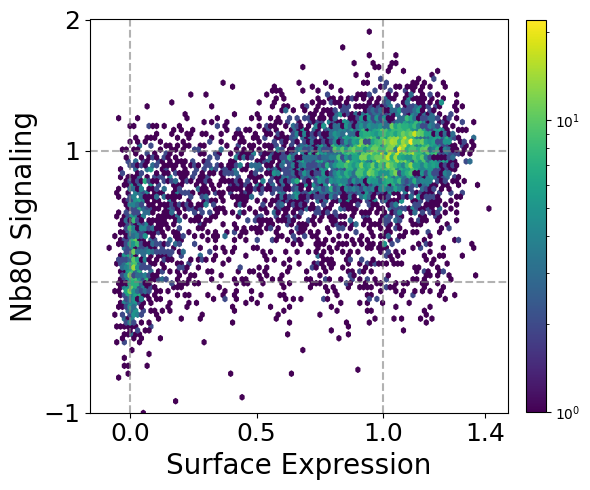

In [5]:
x = b2AR_df_filt_missense['surfexp_reps_comb']
y = b2AR_df_filt_missense['Nb80_isoP_reps_comb']
Nb80_isoP_lowess = lowess(y, x, frac=0.5, it=3, delta=0.0, xvals=x, is_sorted=False, missing='drop', return_sorted=True)


plt.figure(figsize=(6, 5))

b2AR_df_filt_missense['Nb80_isoP_lowess'] = Nb80_isoP_lowess
b2AR_df_filt_missense['Nb80_isoP_residual'] = b2AR_df_filt_missense['Nb80_isoP_reps_comb'] - b2AR_df_filt_missense['Nb80_isoP_lowess']
b2AR_df_filt_missense['Nb80_isoP_zscore'] = b2AR_df_filt_missense['Nb80_isoP_residual'] / b2AR_df_filt_missense['Nb80_isoP_reps_comb_SEM']

plt.axhline(y=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axhline(y=1, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=1, color='grey', linestyle='dashed', alpha=0.6)

plt.hexbin(b2AR_df_filt_missense['surfexp_reps_comb'], \
           b2AR_df_filt_missense['Nb80_isoP_reps_comb'], \
           bins='log', gridsize=100)
plt.xlabel('Surface Expression', fontsize=20)
#plt.plot(b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['surfexp_reps_comb'], \
#         b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['Nb80_isoP_lowess'],color='k')
#plt.ylim(-0.5, 1.6)

plt.ylim(-1, 2)

plt.xticks([0, 0.5, 1, 1.4], fontsize=18)
plt.yticks([-1, 1, 2], fontsize=18)
plt.ylabel('Nb80 Signaling', fontsize=20)
plt.colorbar(fraction=0.043, pad=0.04)

print (scipy.stats.spearmanr(b2AR_df_filt_missense['surfexp_reps_comb'],b2AR_df_filt_missense['Nb80_isoP_reps_comb'] ))
plt.tight_layout()
#plt.savefig('surfexp_Nb80_no_loess.png', dpi=200)

In [6]:
ss_res = sum(b2AR_df_filt_missense['Nb80_isoP_residual']**2)
ss_tot = sum((b2AR_df_filt_missense['Nb80_isoP_reps_comb'] - np.mean(b2AR_df_filt_missense['Nb80_isoP_reps_comb']))**2)
r_squared = 1 - (ss_res / ss_tot)
print (r_squared)
print (ss_res)
print (ss_tot)

0.3702220393046448
674.6942511354348
1071.320835664821


In [7]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["purple","white","green"])


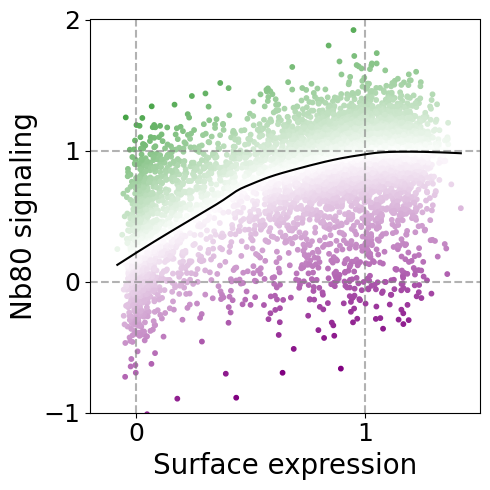

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(x = b2AR_df_filt_missense['surfexp_reps_comb'], y = b2AR_df_filt_missense['Nb80_isoP_reps_comb'], \
           c = b2AR_df_filt_missense['Nb80_isoP_residual'], s=10,  cmap=cmap, vmin=-1.5, vmax=1.5)
plt.xlim(-0.2, 1.5)
plt.ylim(-1, 2)

plt.axhline(y=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axhline(y=1, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=1, color='grey', linestyle='dashed', alpha=0.6)

plt.plot(b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['surfexp_reps_comb'], \
         b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['Nb80_isoP_lowess'],color='k')
#plt.plot(b2AR_sig_surfexp_simprat_df_filt['reps_comb'], b2AR_sig_surfexp_simprat_df_filt['Nb80_isoP_Gal4_reps_comb'], 'ko', alpha=0.1)
plt.xticks([0, 1], fontsize=18)
plt.yticks([-1, 0, 1, 2], fontsize=18)

plt.xlabel('Surface expression', fontsize=20)
plt.ylabel('Nb80 signaling', fontsize=20)
plt.tight_layout()


plt.tight_layout()
#plt.savefig('surfexp_Nb80_loess_color_by_resid.png', dpi=200)

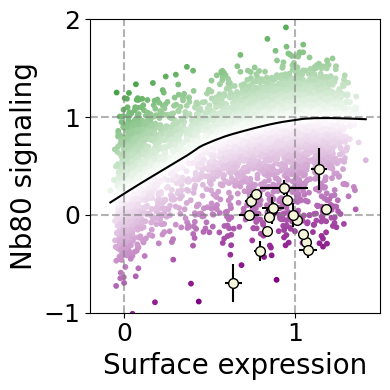

In [9]:
plt.figure(figsize=(4, 4))
plt.scatter(x = b2AR_df_filt_missense['surfexp_reps_comb'], y = b2AR_df_filt_missense['Nb80_isoP_reps_comb'], \
           c = b2AR_df_filt_missense['Nb80_isoP_residual'], s=10,  cmap=cmap, vmin=-1.5, vmax=1.5)
plt.xlim(-0.2, 1.5)
plt.ylim(-1, 2)

plt.axhline(y=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axhline(y=1, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=1, color='grey', linestyle='dashed', alpha=0.6)

plt.plot(b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['surfexp_reps_comb'], \
         b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['Nb80_isoP_lowess'],color='k')
#plt.plot(b2AR_sig_surfexp_simprat_df_filt['reps_comb'], b2AR_sig_surfexp_simprat_df_filt['Nb80_isoP_Gal4_reps_comb'], 'ko', alpha=0.1)
plt.xticks([0, 1], fontsize=18)
plt.yticks([-1, 0, 1, 2], fontsize=18)

plt.xlabel('Surface expression', fontsize=20)
plt.ylabel('Nb80 signaling', fontsize=20)
plt.tight_layout()

sel_df = b2AR_df_filt_missense.loc[b2AR_df_filt_missense['pos'] == 113]
#sel_df = b2AR_df_filt_missense.loc[b2AR_df_filt_missense['pos'] == 268]
#sel_df = b2AR_df_filt_missense.loc[b2AR_df_filt_missense['pos'] == 120]
#sel_df = b2AR_df_filt_missense.loc[b2AR_df_filt_missense['pos'] == 282]

plt.errorbar(sel_df['surfexp_reps_comb'], sel_df['Nb80_isoP_reps_comb'], \
             marker='o', color='k', markerfacecolor='beige', linestyle='None', markersize=7, \
            yerr=sel_df['Nb80_isoP_reps_comb_SEM'], xerr=sel_df['surfexp_reps_comb_SEM'])


##uncomment the following to plot also the identities of the amino acid variants.
#surfexp_vals = list(sel_df['surfexp_reps_comb'])
#Nb80_vals = list(sel_df['Nb80_isoP_reps_comb'])
#label = [i[-1] for i in list(sel_df.index)]

#for index_pos in range(0, len(surfexp_vals)):
#    plt.annotate(label[index_pos], (surfexp_vals[index_pos]+0.01, Nb80_vals[index_pos]+0.01), fontsize=12, fontweight='bold', color='k')


plt.tight_layout()
#plt.savefig('surfexp_vs_Nb80_113_highlight.png', dpi=250)

In [10]:
print (scipy.stats.spearmanr(b2AR_df_filt['surfexp_reps_comb'], \
           b2AR_df_filt['Nb80_isoP_reps_comb']))

print (scipy.stats.spearmanr(b2AR_df_filt['surfexp_reps_comb'], \
           b2AR_df_filt['BArr_isoP_reps_comb']))

SignificanceResult(statistic=np.float64(0.5508067513581947), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.6009573909738447), pvalue=np.float64(0.0))


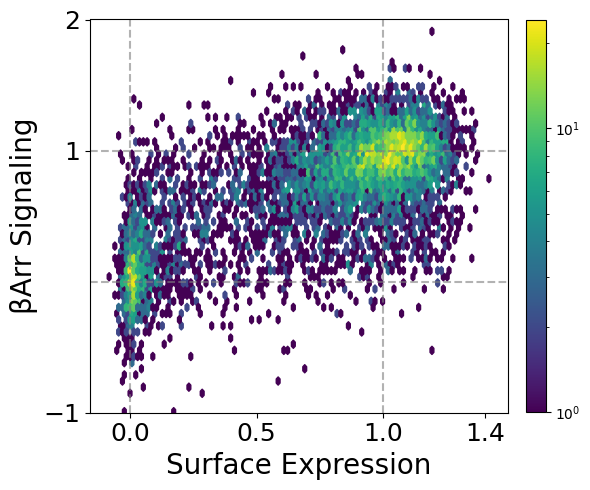

In [11]:
x = b2AR_df_filt_missense['surfexp_reps_comb']
y = b2AR_df_filt_missense['BArr_isoP_reps_comb']
BArr_isoP_lowess = lowess(y, x, frac=0.5, it=3, delta=0.0, xvals=x, is_sorted=False, missing='drop', return_sorted=True)


plt.figure(figsize=(6, 5))

b2AR_df_filt_missense['BArr_isoP_lowess'] = Nb80_isoP_lowess
b2AR_df_filt_missense['BArr_isoP_residual'] = b2AR_df_filt_missense['BArr_isoP_reps_comb'] - b2AR_df_filt_missense['BArr_isoP_lowess']
b2AR_df_filt_missense['BArr_isoP_zscore'] = b2AR_df_filt_missense['BArr_isoP_residual'] / b2AR_df_filt_missense['BArr_isoP_reps_comb_SEM']

plt.axhline(y=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axhline(y=1, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=1, color='grey', linestyle='dashed', alpha=0.6)

plt.hexbin(b2AR_df_filt_missense['surfexp_reps_comb'], \
           b2AR_df_filt_missense['BArr_isoP_reps_comb'], \
           bins='log', gridsize=100)
plt.xlabel('Surface Expression', fontsize=20)
#plt.plot(b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['surfexp_reps_comb'], \
#         b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['Nb80_isoP_lowess'],color='k')
#plt.ylim(-0.5, 1.6)

plt.ylim(-1, 2)

plt.xticks([0, 0.5, 1, 1.4], fontsize=18)
plt.yticks([-1, 1, 2], fontsize=18)
plt.ylabel('βArr Signaling', fontsize=20)
plt.colorbar(fraction=0.043, pad=0.04)


plt.tight_layout()
#plt.savefig('surfexp_BArr_no_loess.png', dpi=200)

In [12]:
ss_res = sum(b2AR_df_filt_missense['BArr_isoP_residual']**2)
ss_tot = sum((b2AR_df_filt_missense['BArr_isoP_reps_comb'] - np.mean(b2AR_df_filt_missense['BArr_isoP_reps_comb']))**2)
r_squared = 1 - (ss_res / ss_tot)
print (r_squared)
print (ss_res)
print (ss_tot)

0.4227642550503824
710.1191279628197
1230.2064350238747


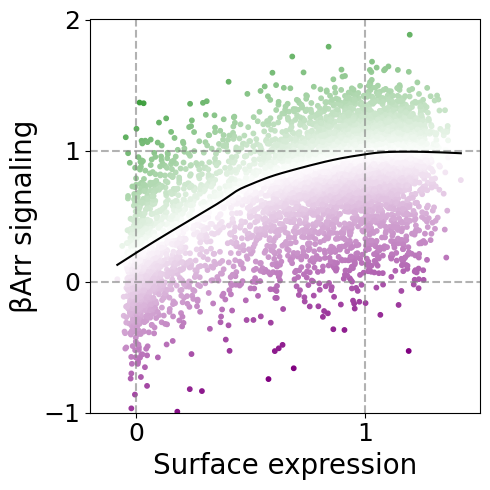

In [13]:
plt.figure(figsize=(5, 5))
plt.scatter(x = b2AR_df_filt_missense['surfexp_reps_comb'], y = b2AR_df_filt_missense['BArr_isoP_reps_comb'], \
           c = b2AR_df_filt_missense['BArr_isoP_residual'], s=10,  cmap=cmap, vmin=-1.5, vmax=1.5)
plt.xlim(-0.2, 1.5)
plt.ylim(-1, 2)

plt.axhline(y=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axhline(y=1, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=1, color='grey', linestyle='dashed', alpha=0.6)

plt.plot(b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['surfexp_reps_comb'], \
         b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['BArr_isoP_lowess'],color='k')
#plt.plot(b2AR_sig_surfexp_simprat_df_filt['reps_comb'], b2AR_sig_surfexp_simprat_df_filt['Nb80_isoP_Gal4_reps_comb'], 'ko', alpha=0.1)
plt.xticks([0, 1], fontsize=18)
plt.yticks([-1, 0, 1, 2], fontsize=18)

plt.xlabel('Surface expression', fontsize=20)
plt.ylabel('βArr signaling', fontsize=20)
plt.tight_layout()


plt.tight_layout()
#plt.savefig('surfexp_BArr_loess_color_by_resid.png', dpi=200)

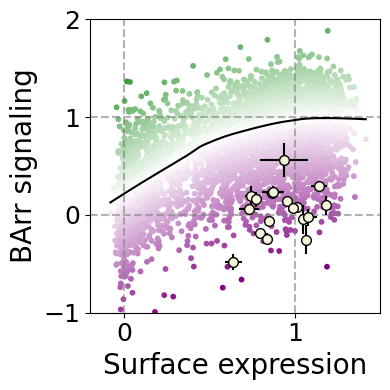

In [14]:
plt.figure(figsize=(4, 4))
plt.scatter(x = b2AR_df_filt_missense['surfexp_reps_comb'], y = b2AR_df_filt_missense['BArr_isoP_reps_comb'], \
           c = b2AR_df_filt_missense['BArr_isoP_residual'], s=10,  cmap=cmap, vmin=-1.5, vmax=1.5)
plt.xlim(-0.2, 1.5)
plt.ylim(-1, 2)

plt.axhline(y=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axhline(y=1, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=1, color='grey', linestyle='dashed', alpha=0.6)

plt.plot(b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['surfexp_reps_comb'], \
         b2AR_df_filt_missense.sort_values('surfexp_reps_comb')['BArr_isoP_lowess'],color='k')
#plt.plot(b2AR_sig_surfexp_simprat_df_filt['reps_comb'], b2AR_sig_surfexp_simprat_df_filt['Nb80_isoP_Gal4_reps_comb'], 'ko', alpha=0.1)
plt.xticks([0, 1], fontsize=18)
plt.yticks([-1, 0, 1, 2], fontsize=18)

plt.xlabel('Surface expression', fontsize=20)
plt.ylabel('BArr signaling', fontsize=20)
plt.tight_layout()

sel_df = b2AR_df_filt_missense.loc[b2AR_df_filt_missense['pos'] == 113]
#sel_df = b2AR_df_filt_missense.loc[b2AR_df_filt_missense['pos'] == 268]
#sel_df = b2AR_df_filt_missense.loc[b2AR_df_filt_missense['pos'] == 120]

plt.errorbar(sel_df['surfexp_reps_comb'], sel_df['BArr_isoP_reps_comb'], \
             marker='o', color='k', markerfacecolor='beige', linestyle='None', markersize=7, \
            yerr=sel_df['BArr_isoP_reps_comb_SEM'], xerr=sel_df['surfexp_reps_comb_SEM'])


plt.tight_layout()
#plt.savefig('surfexp_vs_BArr_113_highlight.png', dpi=250)

In [15]:
pos_list = []
num_considered = []
pvals = []
average_residual = []
average_zscore = []
IQR_list = []
for pos in range(2, 414):
    test_df = b2AR_df_filt_missense.loc[b2AR_df_filt_missense['pos'] == pos]
    compare_df = b2AR_df_filt_missense.loc[b2AR_df_filt_missense['pos'] != pos]
    if len(test_df) > 0:
        pvals.append(scipy.stats.mannwhitneyu(test_df['Nb80_isoP_zscore'], compare_df['Nb80_isoP_zscore'], alternative='two-sided', method='asymptotic')[1])
        pos_list.append(pos)
        IQR_list.append(abs (np.percentile(test_df['Nb80_isoP_zscore'], 75) - np.percentile(test_df['Nb80_isoP_zscore'], 25)))
        num_considered.append(len(test_df))
        average_zscore.append(np.average(test_df['Nb80_isoP_zscore']))
        average_residual.append(np.average(test_df['Nb80_isoP_residual']))
    else:
        pvals.append(np.nan)
        pos_list.append(pos)
        IQR_list.append(np.nan)
        num_considered.append(0)
        average_zscore.append(np.nan)
        average_residual.append(np.nan)
comp_df = pd.DataFrame(index=pos_list)
comp_df['num_considered_Nb80_isoP'] = num_considered
comp_df['average_zscore_Nb80_isoP'] = average_zscore
comp_df['average_residual_Nb80_isoP'] = average_residual
comp_df['Nb80_IQR'] = IQR_list
comp_df['pval_Nb80_isoP'] = pvals

results = statsmodels.stats.multitest.multipletests(comp_df['pval_Nb80_isoP'], alpha=0.1, method='fdr_bh', is_sorted=False, returnsorted=False)
comp_df['Nb80_isoP_FDR_bool'] = results[0]
comp_df['Nb80_isoP_FDR_val'] = results[1]

In [16]:
pos_list = []
num_considered = []
pvals = []
average_zscore = []
average_residual = []
IQR_list = []
for pos in range(2, 414):
    test_df = b2AR_df_filt_missense.loc[b2AR_df_filt_missense['pos'] == pos]
    compare_df = b2AR_df_filt_missense.loc[b2AR_df_filt_missense['pos'] != pos]
    if len(test_df) > 0:
        pvals.append(scipy.stats.mannwhitneyu(test_df['BArr_isoP_zscore'], compare_df['BArr_isoP_zscore'], alternative='two-sided', method='asymptotic')[1])
        pos_list.append(pos)
        IQR_list.append(abs (np.percentile(test_df['BArr_isoP_zscore'], 75) - np.percentile(test_df['BArr_isoP_zscore'], 25)))
        num_considered.append(len(test_df))
        average_zscore.append(np.average(test_df['BArr_isoP_zscore']))
        average_residual.append(np.average(test_df['BArr_isoP_residual']))
    else:
        pvals.append(np.nan)
        pos_list.append(pos)
        IQR_list.append(np.nan)
        num_considered.append(0)
        average_zscore.append(np.nan)
        average_residual.append(np.nan)
#comp_df = pd.DataFrame(index=pos_list)
comp_df['num_considered_BArr_isoP'] = num_considered
comp_df['average_zscore_BArr_isoP'] = average_zscore
comp_df['average_residual_BArr_isoP'] = average_residual
comp_df['BArr_IQR'] = IQR_list
comp_df['pval_BArr_isoP'] = pvals

results = statsmodels.stats.multitest.multipletests(comp_df['pval_BArr_isoP'], alpha=0.1, method='fdr_bh', is_sorted=False, returnsorted=False)
comp_df['BArr_isoP_FDR_bool'] = results[0]
comp_df['BArr_isoP_FDR_val'] = results[1]

In [17]:
comp_df['minlog10pval_Nb80'] = -np.log10(comp_df['Nb80_isoP_FDR_val'])
comp_df['minlog10pval_BArr'] = -np.log10(comp_df['BArr_isoP_FDR_val'])

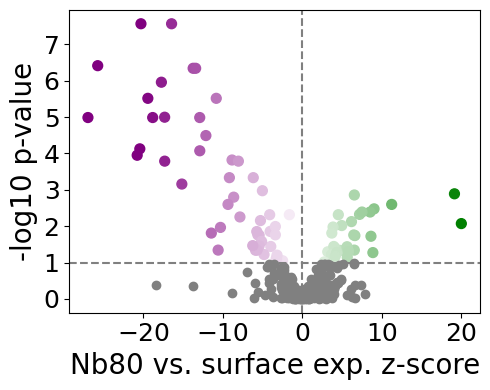

In [18]:
plt.figure(figsize=(5, 4))
below_thresh = comp_df.loc[comp_df['minlog10pval_Nb80'] < 1]
above_thresh = comp_df.loc[(comp_df['minlog10pval_Nb80'] >= 1)]
above_thresh_neg = comp_df.loc[(comp_df['minlog10pval_Nb80'] >= 1) & (comp_df['average_zscore_Nb80_isoP'] > 0)]
above_thresh_pos = comp_df.loc[(comp_df['minlog10pval_Nb80'] >= 1) & (comp_df['average_zscore_Nb80_isoP'] < 0)]

plt.plot(below_thresh['average_zscore_Nb80_isoP'], below_thresh['minlog10pval_Nb80'], color='gray', marker='o', linestyle='None')

#plt.plot(above_thresh_neg['average_zscore_Nb80_isoP'], above_thresh_neg['minlog10pval_Nb80'], color='green', marker='o', linestyle='None')
#plt.plot(above_thresh_pos['average_zscore_Nb80_isoP'], above_thresh_pos['minlog10pval_Nb80'], color='purple', marker='o', linestyle='None')

plt.scatter(x = above_thresh['average_zscore_Nb80_isoP'], y = above_thresh['minlog10pval_Nb80'], \
           c = above_thresh['average_zscore_Nb80_isoP'], s=50,  cmap=cmap, vmin=-20, vmax=20)


plt.axvline(x = 0, color='grey', linestyle='dashed')
plt.axhline(y = 1, color='grey', linestyle='dashed')

plt.ylabel('-log10 p-value', fontsize=20)
plt.xlabel('Nb80 vs. surface exp. z-score', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.tight_layout()
#plt.savefig('Nb80_volcano_purple_green.png', dpi=200)

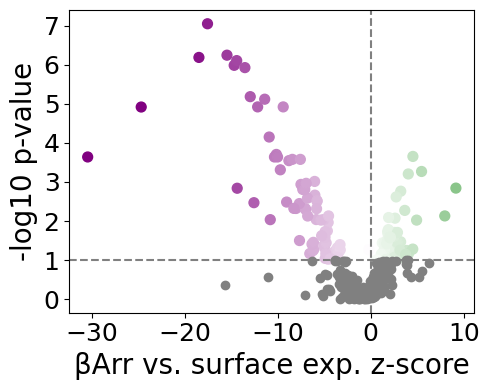

In [19]:
plt.figure(figsize=(5, 4))
below_thresh = comp_df.loc[comp_df['minlog10pval_BArr'] < 1]
above_thresh = comp_df.loc[(comp_df['minlog10pval_BArr'] >= 1)]

plt.plot(below_thresh['average_zscore_BArr_isoP'], below_thresh['minlog10pval_BArr'], color='gray', marker='o', linestyle='None')

plt.scatter(x = above_thresh['average_zscore_BArr_isoP'], y = above_thresh['minlog10pval_BArr'], \
           c = above_thresh['average_zscore_BArr_isoP'], s=50,  cmap=cmap, vmin=-20, vmax=20)


plt.axvline(x = 0, color='grey', linestyle='dashed')
plt.axhline(y = 1, color='grey', linestyle='dashed')

plt.ylabel('-log10 p-value', fontsize=20)
plt.xlabel('βArr vs. surface exp. z-score', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks([-30, -20, -10, 0, 10], fontsize=18)
plt.tight_layout()
#plt.savefig('BArr_volcano_purple_green.png', dpi=200)

8.07458687782242
9.953534645540433


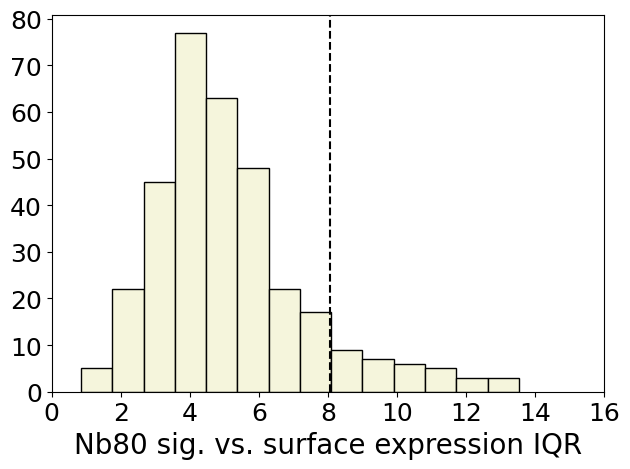

In [20]:
plt.hist(comp_df.loc[comp_df['Nb80_isoP_FDR_bool'] == False]['Nb80_IQR'], color='beige', edgecolor='k', bins=14)
plt.axvline(x = np.percentile(comp_df.loc[comp_df['Nb80_isoP_FDR_bool'] == False]['Nb80_IQR'], 90), color='k', linestyle='dashed')

plt.xlabel('Νb80 sig. vs. surface expression IQR', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 16)
print (np.percentile(comp_df.loc[comp_df['Nb80_isoP_FDR_bool'] == False]['Nb80_IQR'], 90))
print (np.percentile(comp_df.loc[comp_df['Nb80_isoP_FDR_bool'] == False]['Nb80_IQR'], 95))

plt.tight_layout()
plt.savefig('Nb80_surfexp_IQR.png', dpi=250)

6.278576171460042
6.868992195036942


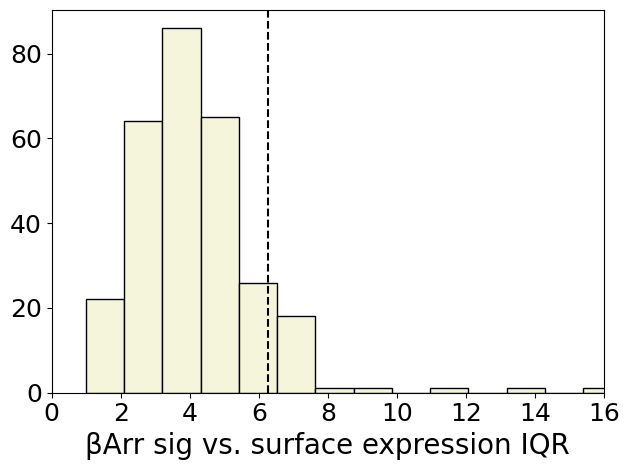

In [21]:
plt.hist(comp_df.loc[comp_df['BArr_isoP_FDR_bool'] == False]['BArr_IQR'], color='beige', edgecolor='k', bins=14)
plt.axvline(x = np.percentile(comp_df.loc[comp_df['BArr_isoP_FDR_bool'] == False]['BArr_IQR'], 90), color='k', linestyle='dashed')

plt.xlabel('βArr sig vs. surface expression IQR', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 16)

print (np.percentile(comp_df.loc[comp_df['BArr_isoP_FDR_bool'] == False]['BArr_IQR'], 90))
print (np.percentile(comp_df.loc[comp_df['BArr_isoP_FDR_bool'] == False]['BArr_IQR'], 95))

plt.tight_layout()
plt.savefig('BArr_surfexp_IQR.png', dpi=250)

SignificanceResult(statistic=np.float64(0.6956640733115151), pvalue=np.float64(7.142340011393555e-61))
PearsonRResult(statistic=np.float64(0.7319975474034579), pvalue=np.float64(2.5148013115773675e-70))


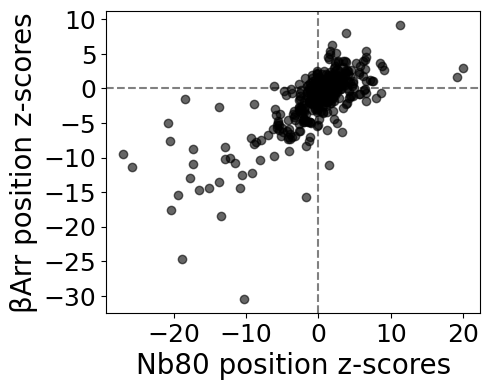

In [22]:
plt.figure(figsize=(5, 4))


plt.axhline(y=0, color='grey', linestyle='dashed')
plt.axvline(x=0, color='grey', linestyle='dashed')
plt.plot(comp_df['average_zscore_Nb80_isoP'], comp_df['average_zscore_BArr_isoP'], 'ko', alpha=0.6)
print (scipy.stats.spearmanr(comp_df['average_zscore_Nb80_isoP'], comp_df['average_zscore_BArr_isoP']))
print (scipy.stats.pearsonr(comp_df['average_zscore_Nb80_isoP'], comp_df['average_zscore_BArr_isoP']))

plt.xlabel('Nb80 position z-scores', fontsize=20)
plt.ylabel('βArr position z-scores', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('Nb80_BArr_zscores.png', dpi=250)

SignificanceResult(statistic=np.float64(0.43508670360543344), pvalue=np.float64(1.8560576212799922e-20))
PearsonRResult(statistic=np.float64(0.5617234811284413), pvalue=np.float64(1.232349080095617e-35))


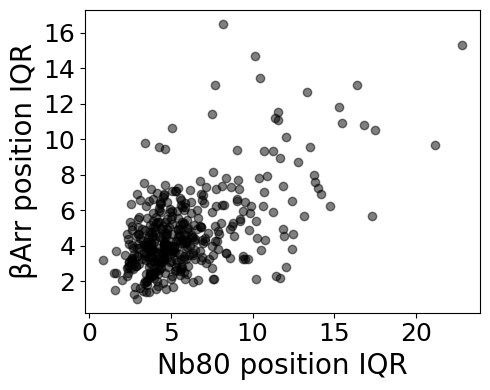

In [23]:
plt.figure(figsize=(5, 4))
plt.plot(comp_df['Nb80_IQR'], comp_df['BArr_IQR'], 'ko', alpha=0.5)
plt.xlabel('Nb80 position IQR', fontsize=20)
plt.ylabel('βArr position IQR', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
print (scipy.stats.spearmanr(comp_df['Nb80_IQR'], comp_df['BArr_IQR']))
print (scipy.stats.pearsonr(comp_df['Nb80_IQR'], comp_df['BArr_IQR']))

plt.tight_layout()
plt.savefig('Nb80_BArr_IQR_plot.png', dpi=200)

In [24]:
Nb80_LoF_hits = list(comp_df.loc[(comp_df['Nb80_isoP_FDR_bool'] == True) & (comp_df['average_zscore_Nb80_isoP'] < 0)].index)
BArr_LoF_hits = list(comp_df.loc[(comp_df['BArr_isoP_FDR_bool'] == True) & (comp_df['average_zscore_BArr_isoP'] < 0)].index)
overlap_LoF_hits = [i for i in Nb80_LoF_hits if i in BArr_LoF_hits]
print (len(Nb80_LoF_hits))
print (len(BArr_LoF_hits))
print (len([i for i in Nb80_LoF_hits if i in BArr_LoF_hits]))

49
73
47


In [25]:
Nb80_GoF_hits = list(comp_df.loc[(comp_df['Nb80_isoP_FDR_bool'] == True) & (comp_df['average_zscore_Nb80_isoP'] > 0)].index)
BArr_GoF_hits = list(comp_df.loc[(comp_df['BArr_isoP_FDR_bool'] == True) & (comp_df['average_zscore_BArr_isoP'] > 0)].index)
overlap_GoF_hits = [i for i in Nb80_GoF_hits if i in BArr_GoF_hits]
print (len(Nb80_GoF_hits))
print (len(BArr_GoF_hits))
print (len([i for i in Nb80_GoF_hits if i in BArr_GoF_hits]))

31
53
20


In [26]:
Nb80_CoF_hits = comp_df.loc[(comp_df['Nb80_isoP_FDR_bool'] == False) & (comp_df['Nb80_IQR'] > 8.066322604636941)].index
BArr_CoF_hits = comp_df.loc[(comp_df['BArr_isoP_FDR_bool'] == False) & (comp_df['BArr_IQR'] > 6.24986504850853)].index
overlap_CoF_hits = [i for i in Nb80_CoF_hits if i in BArr_CoF_hits]
print (len(Nb80_CoF_hits))
print (len(BArr_CoF_hits))
print (len([i for i in Nb80_CoF_hits if i in BArr_CoF_hits]))

34
31
8


In [27]:
cterm = list(set(b2AR_df.loc[b2AR_df['topo'] == 'Cterm'].pos))
len(cterm)

84

In [28]:
from scipy.stats import fisher_exact


In [29]:
non_GoF = [i for i in range(2, 414) if i not in overlap_GoF_hits]


GoF_Cterm = len([i for i in overlap_GoF_hits if i in cterm])
GoF_non_Cterm = len([i for i in overlap_GoF_hits if i not in cterm])

non_GoF_Cterm = len([i for i in non_GoF if i in cterm])
non_GoF_non_Cterm = len([i for i in non_GoF if i not in cterm])

print (GoF_Cterm + GoF_non_Cterm + non_GoF_Cterm + non_GoF_non_Cterm)

#test for enrichment of CoF in second shell

table = np.array([[GoF_Cterm, non_GoF_Cterm], [GoF_non_Cterm, non_GoF_non_Cterm]])
res = fisher_exact(table, alternative='greater')

res

412


SignificanceResult(statistic=np.float64(2.202797202797203), pvalue=np.float64(0.0889910408937331))

In [30]:
print (overlap_LoF_hits)
print (overlap_GoF_hits)
print (overlap_CoF_hits)

[76, 78, 79, 82, 88, 106, 113, 114, 117, 118, 119, 121, 127, 128, 129, 131, 135, 136, 138, 139, 141, 165, 190, 191, 193, 199, 203, 204, 207, 208, 209, 219, 286, 289, 290, 293, 294, 312, 315, 318, 322, 325, 326, 327, 328, 329, 330]
[87, 101, 124, 130, 170, 187, 189, 218, 231, 251, 268, 283, 313, 345, 355, 359, 362, 375, 392, 410]
[47, 120, 122, 215, 306, 311, 321, 332]


In [32]:
Nb80_CoF_annot = []
BArr_CoF_annot = []
shared_CoF = []
for pos in comp_df.index:
    if pos in Nb80_CoF_hits:
        Nb80_CoF_annot.append(True)
    else:
        Nb80_CoF_annot.append(False)
    
    if pos in BArr_CoF_hits:
        BArr_CoF_annot.append(True)
    else:
        BArr_CoF_annot.append(False)

    if pos in overlap_CoF_hits:
        shared_CoF.append(True)
    else:
        shared_CoF.append(False)

In [33]:
comp_df['Nb80_CoF'] = Nb80_CoF_annot
comp_df['BArr_CoF'] = BArr_CoF_annot
comp_df['overlap_CoF'] = shared_CoF


In [34]:
comp_df.to_excel('Nb80_BArr_surfexp_supp_table.xlsx')